Added marital status features: ['Marital_Divorced', 'Marital_Married', 'Marital_Single', 'Marital_Together', 'Marital_Widow']
Income clustering features: ['Income', 'Age', 'Education', 'Total_Dependents', 'Is_Parent', 'Tenure_Days', 'Marital_Divorced', 'Marital_Married', 'Marital_Single', 'Marital_Together', 'Marital_Widow']


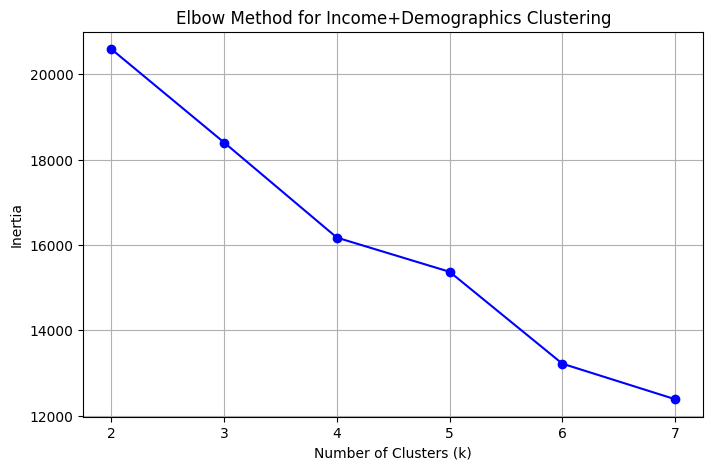

Income Cluster Summary:
                  Income   Age  Education  Total_Dependents  Is_Parent  \
Income_Cluster                                                           
0               51991.95  56.2       2.47              0.91       0.68   
1               52060.49  57.2       2.44              0.98       0.73   
2               51620.80  55.4       2.47              0.97       0.73   

                Tenure_Days  Marital_Divorced  Marital_Married  \
Income_Cluster                                                   
0                   4390.69              0.29              0.0   
1                   4391.82              0.00              0.0   
2                   4387.07              0.00              1.0   

                Marital_Single  Marital_Together  Marital_Widow  
Income_Cluster                                                   
0                         0.61               0.0            0.1  
1                         0.00               1.0            0.0  
2         

In [11]:
# Income-Based Clustering with Demographics

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# Load the featured dataset
df = pd.read_csv('featured_customer_segmentation.csv')

# Select income-related features with demographics (REMOVED Total_Spending)
income_features = [
    'Income',
    'Age',
    'Education',
    'Total_Dependents',
    'Is_Parent',
    'Tenure_Days'
]

# Check if marital status columns exist and add them
marital_cols = [col for col in df.columns if col.startswith('Marital_')]
if marital_cols:
    income_features.extend(marital_cols)
    print(f"Added marital status features: {marital_cols}")

print(f"Income clustering features: {income_features}")

# Prepare the data
X = df[income_features].copy()

# Handle any missing values
for col in X.columns:
    if X[col].isnull().sum() > 0:
        X[col] = X[col].fillna(X[col].mean())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using elbow method
inertias = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Income+Demographics Clustering')
plt.grid(True)
plt.show()

# Apply clustering with optimal k (let's use 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Income_Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
cluster_summary = df.groupby('Income_Cluster')[income_features].mean().round(2)
print("Income Cluster Summary:")
print(cluster_summary)

# Count customers per cluster
print("\nCustomers per cluster:")
print(df['Income_Cluster'].value_counts().sort_index())

# Additional analysis showing demographics impact
print("\nDetailed Demographics Impact Analysis:")
for cluster in sorted(df['Income_Cluster'].unique()):
    cluster_data = df[df['Income_Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"  Average Income: ${cluster_data['Income'].mean():.0f}")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f}")
    print(f"  Average Dependents: {cluster_data['Total_Dependents'].mean():.1f}")
    print(f"  Average Education: {cluster_data['Education'].mean():.1f}")
    print(f"  % Parents: {(cluster_data['Is_Parent'] == 1).mean()*100:.1f}%")
    print(f"  Average Tenure: {cluster_data['Tenure_Days'].mean():.0f} days")
    if marital_cols:
        # Find most common marital status
        marital_data = cluster_data[marital_cols]
        most_common_marital = marital_data.mean().idxmax().replace('Marital_', '')
        print(f"  Most common marital status: {most_common_marital}")

Income Cluster Means:
                      Income        Age  Education  Total_Dependents  \
Income_Cluster                                                         
0               51991.948548  56.199495   2.467172          0.912879   
1               52060.490517  57.196552   2.439655          0.979310   
2               51620.796371  55.399770   2.467742          0.965438   

                Is_Parent  Tenure_Days  Marital_Divorced  Marital_Married  \
Income_Cluster                                                              
0                0.681818  4390.694444          0.292929              0.0   
1                0.734483  4391.818966          0.000000              0.0   
2                0.732719  4387.072581          0.000000              1.0   

                Marital_Single  Marital_Together  Marital_Widow  
Income_Cluster                                                   
0                     0.609848               0.0       0.097222  
1                     0.000000   

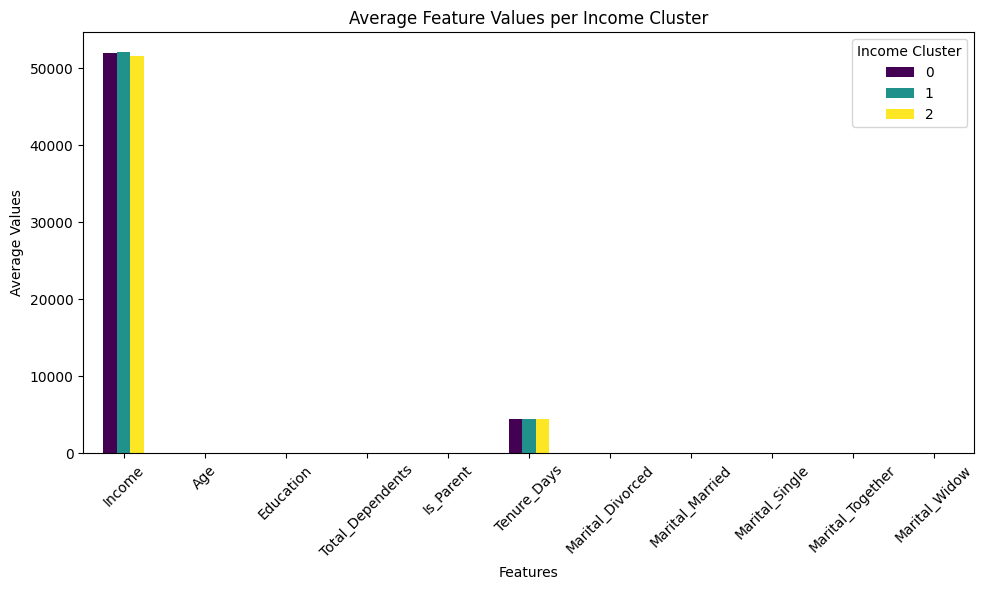

In [12]:
# Transpose the DataFrame so categories are on the x-axis
cluster_means_income = df.groupby('Income_Cluster')[income_features].mean()

print("Income Cluster Means:")
print(cluster_means_income)

# Transpose for easier plotting (features on x-axis)
cluster_means_income_T = cluster_means_income.T

# Plot grouped bar chart for income clustering
cluster_means_income_T.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title('Average Feature Values per Income Cluster')
plt.xlabel('Features')
plt.ylabel('Average Values')
plt.legend(title='Income Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Normalized Income Cluster Features (%):
                Income  Total_Spending     Age  Education
Income_Cluster                                           
0                99.87          100.00   98.26      99.98
1               100.00           98.52  100.00      98.86
2                99.16           95.43   96.86     100.00


/var/folders/t4/fp87jt9n1438scx07zt_2q_80000gp/T/ipykernel_52060/3346396750.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in current_values])


<Figure size 1200x800 with 0 Axes>

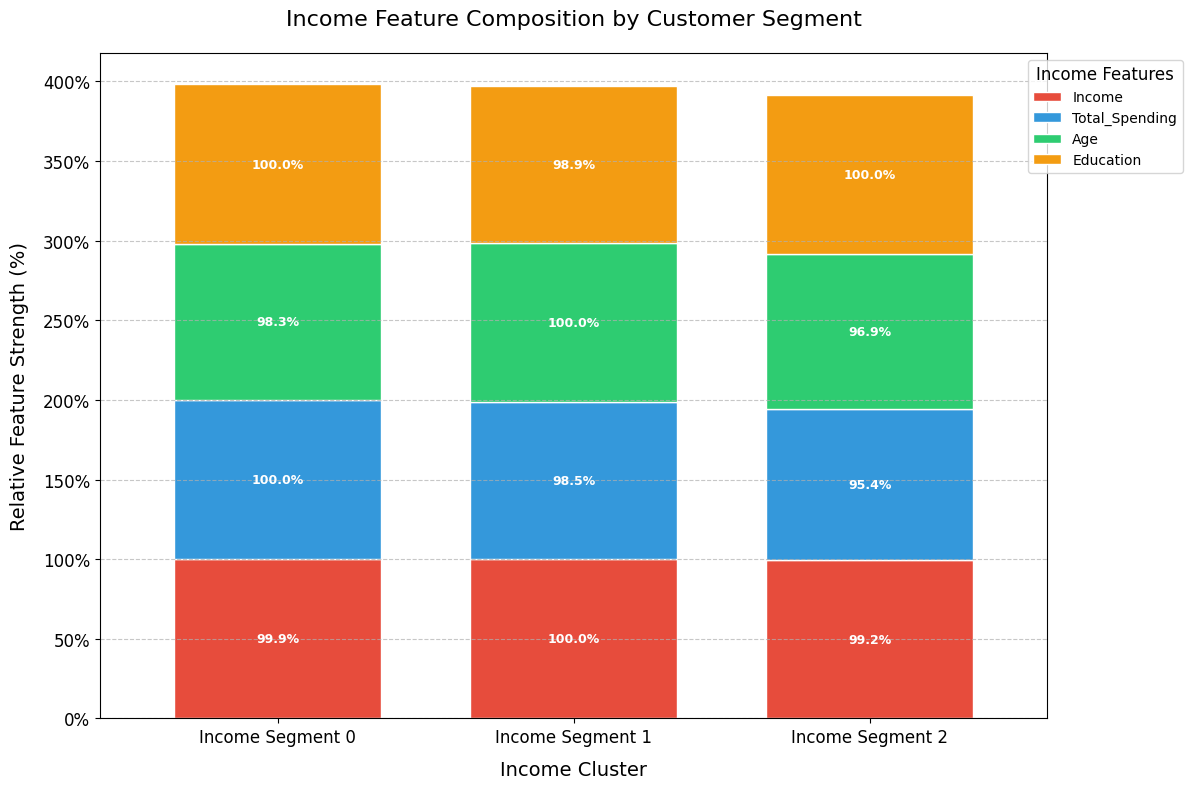

In [13]:
# Normalize income features by total per cluster for income clustering
normalized_income = df.groupby('Income_Cluster')[
    ['Income', 'Total_Spending', 'Age', 'Education']
].mean()

# Create proportional representation (normalize by max value in each feature)
# Since these features have different scales, we'll normalize each feature separately
normalized_income_scaled = normalized_income.copy()
for col in normalized_income_scaled.columns:
    max_val = normalized_income_scaled[col].max()
    normalized_income_scaled[col] = (normalized_income_scaled[col] / max_val) * 100

print("Normalized Income Cluster Features (%):")
print(normalized_income_scaled.round(2))

# Create a colorful stacked bar chart for income features
plt.figure(figsize=(12, 8))

# Use a different color palette for income features
income_colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']
normalized_income_scaled.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=income_colors,
    width=0.7,
    edgecolor='white'
)

# Enhance styling
plt.title('Income Feature Composition by Customer Segment', fontsize=16, pad=20)
plt.xlabel('Income Cluster', fontsize=14, labelpad=10)
plt.ylabel('Relative Feature Strength (%)', fontsize=14, labelpad=10)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add percentage signs to y-axis
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in current_values])

# Improve legend
plt.legend(
    title='Income Features',
    title_fontsize=12,
    fontsize=10,
    loc='upper right',
    bbox_to_anchor=(1.15, 1)
)

# Add value labels on the stacked bars
for i, cluster in enumerate(normalized_income_scaled.index):
    cumulative = 0
    for j, col in enumerate(normalized_income_scaled.columns):
        value = normalized_income_scaled.loc[cluster, col]
        if value > 10:  # Only show labels for segments > 10%
            plt.text(
                i,
                cumulative + value / 2,
                f"{value:.1f}%",
                ha='center',
                va='center',
                fontsize=9,
                fontweight='bold',
                color='white' if value > 20 else 'black'
            )
        cumulative += value

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rename x-axis labels to more meaningful names
plt.gca().set_xticklabels([
    'Income Segment 0',
    'Income Segment 1', 
    'Income Segment 2'
])

plt.tight_layout()
plt.show()



Income Cluster Means:
                      Income        Age  Education  Total_Dependents  \
Income_Cluster                                                         
0               51991.948548  56.199495   2.467172          0.912879   
1               52060.490517  57.196552   2.439655          0.979310   
2               51620.796371  55.399770   2.467742          0.965438   

                Is_Parent  Tenure_Days  Marital_Divorced  Marital_Married  \
Income_Cluster                                                              
0                0.681818  4390.694444          0.292929              0.0   
1                0.734483  4391.818966          0.000000              0.0   
2                0.732719  4387.072581          0.000000              1.0   

                Marital_Single  Marital_Together  Marital_Widow  
Income_Cluster                                                   
0                     0.609848               0.0       0.097222  
1                     0.000000   

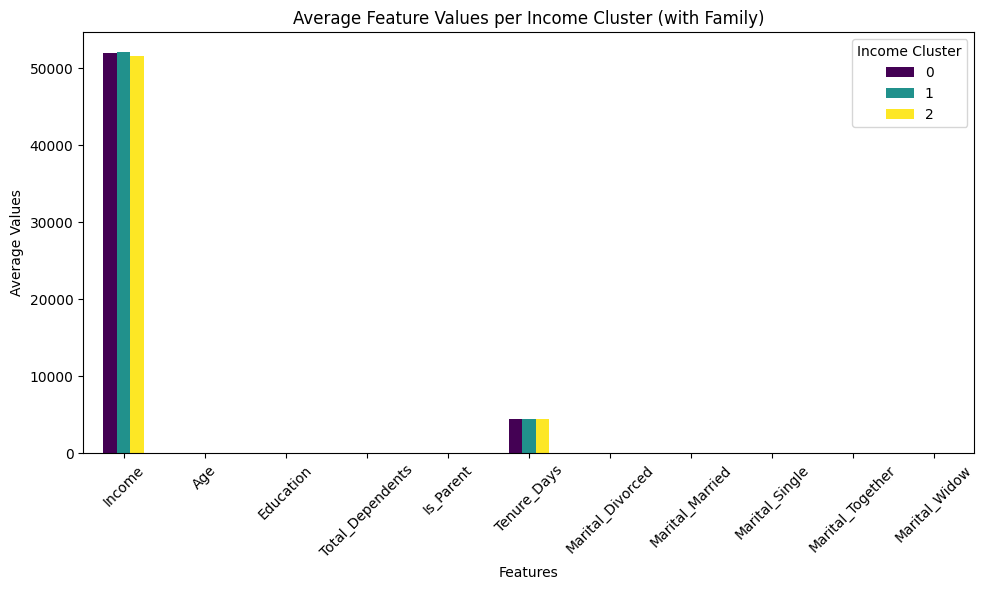

In [14]:
# Transpose the DataFrame so categories are on the x-axis for income clustering
cluster_means_income = df.groupby('Income_Cluster')[income_features].mean()

print("Income Cluster Means:")
print(cluster_means_income)

# Transpose for easier plotting (features on x-axis)
cluster_means_income_T = cluster_means_income.T

# Plot grouped bar chart for income clustering
cluster_means_income_T.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title('Average Feature Values per Income Cluster (with Family)')
plt.xlabel('Features')
plt.ylabel('Average Values')
plt.legend(title='Income Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# Define purchase behavior features (customize as needed)
purchase_behavior_features = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth'
]

# Prepare the purchase behavior data
X_behavior = df[purchase_behavior_features].fillna(0).values

# Cluster customers based on purchase behavior
from sklearn.cluster import KMeans
purchase_kmeans = KMeans(n_clusters=3, random_state=42)
df['PurchaseCluster'] = purchase_kmeans.fit_predict(X_behavior)

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("🛒 SCATTER PLOT ANALYSIS FOR PURCHASE BEHAVIOR CLUSTERS")
print("="*65)

# 1. PCA Scatter Plot - Most comprehensive view of purchase patterns
print("\n1. PCA-based Scatter Plot for Purchase Cluster Visualization")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_behavior)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['PurchaseCluster'], 
                     cmap='viridis', alpha=0.7, s=60, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Purchase Cluster')
plt.xlabel(f'First Principal Component (explains {pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component (explains {pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Customer Purchase Behavior Clusters (PCA View)', fontsize=16, pad=20)
plt.grid(True, alpha=0.3)

# Add cluster centers
centers_pca = pca.transform(purchase_kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', 
           s=300, linewidths=4, label='Cluster Centers')
plt.legend()
plt.tight_layout()
plt.show()

print(f"PCA explains {sum(pca.explained_variance_ratio_):.1%} of total variance in purchase behavior")